<a href="https://colab.research.google.com/github/larrygoyeau/Artificial-Intelligence-for-Partial-Differential-Equations/blob/master/prediction_de_C_et_W_overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
from matplotlib import animation
import sys
np.set_printoptions(threshold=sys.maxsize)

from scipy.interpolate import interp1d

#Import Keras functions for the NN 
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

from IPython.display import clear_output

Ici je teste les reseaux dans le cas ou un intervale de C est retiré de l'ensemble d'apprentissage afin de déceler l'overfitting

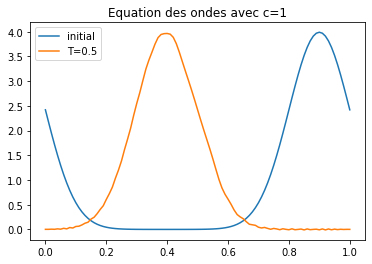

In [ ]:
# @date 2019/11/08
# @author adi_simon, angla_celestine, chassat_perrine, goyeau_larry, laurendeau_matthieu, lehmann_fanny
# @brief create a database on the solutions of simple pde equations


import numpy as np
import matplotlib.pyplot as plt



def gaussian_1D(x, mu, sig):
    Xmin=x[0]-(x[-1]-x[0])
    Xmax=x[-1]+(x[-1]-x[0])
    Nx=x.shape[0]-1
    x2=np.linspace(Xmin,Xmax,3*Nx+1) # on etend l'intervalle de construction de la gaussienne pour garantir la periodicite
    g1=np.exp(-np.power(x2 - mu, 2.) / (2 * sig**2))/np.sqrt(2*np.pi*sig**2)
    g=g1[Nx:2*Nx+1]+g1[:Nx+1]+g1[2*Nx:]
    return g


def diffusion_1D(dx, c, T, u0,affichage=False,cfl=1.0):
    # @return solve PDE of a diffusion equation in 1D
    # @param: dx space step
    #         dt time step
    #         c constant advection velocity
    #         T final time
    #         u_0 initial condition

    Nx=int(1/dx)
    dt=min(0.001,cfl*dx/c)
    Nt=int(T/dt)

    # on periodise u pour avoir les bonnes conditions aux limites
    u=np.zeros(Nx+3)
    u[0]=u0[-1]
    u[-1]=u0[0]
    u[1:-1]=u0

    if affichage:
        X=np.linspace(0,1,Nx+1)
        M=np.max(u0)
        plt.figure(1)
        plt.clf()
        plt.plot(X,u[1:-1])
        plt.axis([0,1,0,M])
        plt.pause(0.1)

    k = c * (dt/dx**2)
    A=np.diag((Nx+3)*[1+2*k])+np.diag((Nx+2)*[-k],1)+np.diag((Nx+2)*[-k],-1)
    B=np.linalg.inv(A)

    # Euler in time, implicit, stable without condition
    for t in range(0, Nt):
        u=np.dot(B,u)
        # Boundary conditions
        u[0] = u[-2]
        u[-1] = u[1]

        if affichage:
            if t%(Nt/100)==0:
                plt.clf()
                plt.plot(X,u[1:-1])
                plt.title("t={}".format(np.round(t*dt,4)))
                plt.axis([0,1,0,M])
                plt.pause(0.1)

    return u[1:-1]




def wave_1D(dx, c, T, u_0,v_0=0,affichage=False,cfl=1.0):
    # @return solve PDE of a diffusion equation in 1D
    # @param: dx space step
    #         dt time step
    #         c constant advection velocity
    #         T final time
    #         u_0 initial condition

    Nx=int(1/dx)
    dt=min(0.001,cfl*dx/c)
    Nt=int(T/dt)

    # on periodise u et v pour avoir les bonnes conditions aux limites
    u0=np.zeros(Nx+1)
    u0=u_0

    v0=np.zeros(Nx+1)
    v0=v_0

    # on utilise un theta-schema avec theta=1/4 (inconditionnellement stable)
    theta=1/4
    A=np.diag((Nx+1)*[1/dt**2+2*c*theta/dx**2])+np.diag((Nx)*[-c*theta/dx**2],1)+np.diag((Nx)*[-c*theta/dx**2],-1)
    A[0,Nx]=-c*theta/dx**2
    A[Nx,0]=-c*theta/dx**2

    B=np.diag((Nx+1)*[2/dt**2-2*c*(1-2*theta)/dx**2])+np.diag((Nx)*[c*(1-2*theta)/dx**2],1)+np.diag((Nx)*[c*(1-2*theta)/dx**2],-1)
    B[0,Nx]=c*(1-2*theta)/dx**2
    B[Nx,0]=c*(1-2*theta)/dx**2

    C=-A
    Ainv=np.linalg.inv(A)

    # on cree u au temps dt
    u=u0+v0*dt

    if affichage:
        X=np.linspace(0,1,Nx+1)
        M=np.max(u0)
        plt.figure(1)
        plt.clf()
        plt.plot(X,u)
        plt.axis([0,1,-M,M])
        plt.pause(0.1)


    for t in range(1, Nt+1):
        u_old=u
        calc=np.dot(B,u)+np.dot(C,u0)
        u=np.dot(Ainv,calc)
        u0=u_old

        if affichage:
            if t%(Nt/100)==0:
                plt.clf()
                plt.plot(X,u)
                plt.title("t={}".format(np.round(t*dt,4)))
                plt.axis([0,1,-M,M])
                plt.pause(0.1)

    return u






Nx=100 # discretisation en espace
mu=0.9
sig=0.1
c=1
T=1/(2*c)

X=np.linspace(0,1,Nx+1)
u0=gaussian_1D(X,mu,sig)

dx=1/Nx
v0=np.zeros(Nx+1)
#v=wave_1D(dx, c, T, u0,v0,affichage=True)
v=wave_1D(dx, c, T, u0,v0)


plt.figure()
plt.plot(X,u0,label="initial")
plt.plot(X,v,label="T={}".format(T))
plt.legend()
plt.title("Equation des ondes avec c={}".format(c))
plt.show()
# 
# 
# 
# t_demi=1/(2*c)
# c2=3*sig**2/(2*t_demi) # on ajuste c pour ne pas avoir trop de diffusion
# u=diffusion_1D(dx,c2,T,u0)
# 
# 
# plt.figure()
# plt.plot(X,u0,label="initial")
# plt.plot(X,u,label="T={}".format(T))
# plt.legend()
# plt.title("Equation de la chaleur avec c={}".format(c))
# plt.show()

In [ ]:
def get_samples(c, T):
    # Numerical parameters
    Nx=100
    dx=1/Nx
    X=np.linspace(0,1,Nx+1)

    # Initial condition
    mu=0.5
    sig=0.11
    u_0 = gaussian_1D(X,mu,sig)

    # Resolution
    u_final_diff = diffusion_1D(dx, c, T, u_0)

    # Initial condition
    v0=np.zeros(Nx+1)

    # Resolution
    u_final_wave = wave_1D(dx, c, T, u_0, v0)

    return u_final_diff, u_final_wave

Toute les valeurs de C entre C_1 et C_2 sont retiré de l'ensemble d'apprentisage.

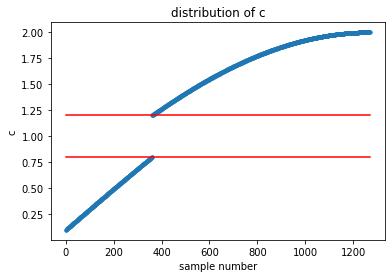

In [ ]:
len_train_set=3000

T=0.34
train_set = []
Cmin=0.1
Cmax=2

#C=Cmin+(Cmax-Cmin)*(np.cos(np.linspace(-np.pi,0,len_train_set/2))+1)/2
C=(Cmax-Cmin)*np.sin(np.linspace(0,np.pi/2,len_train_set/2))+Cmin

C_1=0.8
C_2=1.2

C=np.concatenate((C[:np.argmax(C>C_1)],C[np.argmax(C>C_2):]))
len_train_set=len(C)*2

train_labels = np.zeros(len_train_set)
list_c_train = np.zeros(len_train_set)

plt.plot(C,'.')
plt.plot([0,len(C)],[C_1,C_1],'r-')
plt.plot([0,len(C)],[C_2,C_2],'r-')
plt.title('distribution of c')
plt.ylabel('c')
plt.xlabel('sample number')
plt.show()

In [ ]:
index = 0
iterations = 1

for c in C:
    clear_output()
    print('{}/{}'.format(iterations,len(C)))
    list_c_train[index] = c
    list_c_train[index+1] = c
    diff_data, wave_data = get_samples(c,T)
    train_set.append(diff_data)
    train_set.append(wave_data)
    train_labels[index] = 0
    train_labels[index+1] = 1
    index = index + 2
    iterations += 1

train_set = np.array(train_set)
sol_len=len(train_set[0])

1271/1271


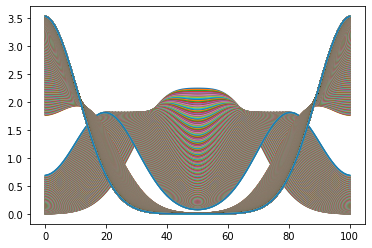

In [ ]:
for i in range(int(len_train_set/2)):
  plt.plot(train_set[2*i+1])

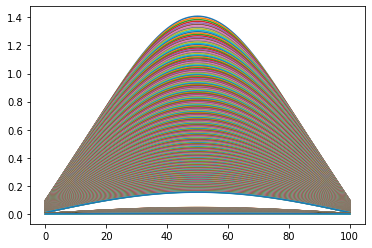

In [ ]:
for i in range(int(len_train_set/2)):
  plt.plot(train_set[2*i])

Le reseau de neurones est simplifé, ici il n'y a que deux couches denséments connectés.

In [ ]:
model_w = Sequential()
model_w.add(layers.Dense(50, activation='relu', input_dim=sol_len))
model_w.add(layers.Dense(1, activation='sigmoid'))

print(model_w.summary())

model_w.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                5100      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 5,151
Trainable params: 5,151
Non-trainable params: 0
_________________________________________________________________
None


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
model_w.fit(train_set,
          train_labels,
          batch_size=500,
          epochs=100,
          validation_split=0.2,
          verbose=1)




Train on 2033 samples, validate on 509 samples
Epoch 1/100





2033/2033 [==============================] - 1s 275us/step - loss: 0.6398 - acc: 0.5691 - val_loss: 0.4052 - val_acc: 1.0000
Epoch 2/100
2033/2033 [==============================] - 0s 8us/step - loss: 0.4279 - acc: 0.8210 - val_loss: 0.3605 - val_acc: 1.0000
Epoch 3/100
2033/2033 [==============================] - 0s 7us/step - loss: 0.4001 - acc: 0.8396 - val_loss: 0.3469 - val_acc: 1.0000
Epoch 4/100
2033/2033 [==============================] - 0s 8us/step - loss: 0.3848 - acc: 0.9429 - val_loss: 0.3371 - val_acc: 1.0000
Epoch 5/100
2033/2033 [==============================] - 0s 9us/step - loss: 0.3724 - acc: 0.9631 - val_loss: 0.3300 - val_acc: 1.0000
Epoch 6/100
2033/2033 [==============================] - 0s 8us/step - loss: 0.3627 - acc: 0.9725 - val_loss: 0.3240 - val_acc: 1.0000
Epoch 7/100
2033/2033 [==============================] - 0s 7us/step - loss: 0.3535 - acc: 0.9838 - val_loss: 0.3182 - val_acc: 1.000

Ici je crée un ensemble test de 400 éléments.

In [ ]:
len_test_set=400
test_labels = np.zeros(len_test_set)
c_test = np.zeros(len_test_set)
T=0.34
test_set = []
index = 0
iterations = 1

for c in np.linspace(Cmin,Cmax,len_test_set/2):
    clear_output()
    print('{}/200'.format(iterations))
    c_test[index] = c
    c_test[index+1] = c
    diff_data, wave_data = get_samples(c,T)
    test_set.append(diff_data)
    test_set.append(wave_data)
    test_labels[index] = 0
    test_labels[index+1] = 1
    index = index + 2
    iterations += 1

test_set = np.array(test_set)

200/200


In [ ]:
pred=model_w.predict(test_set)

Text(0.5, 1.0, 'Prediction of the equation type \n 0 = diffusion - 1 = wave')

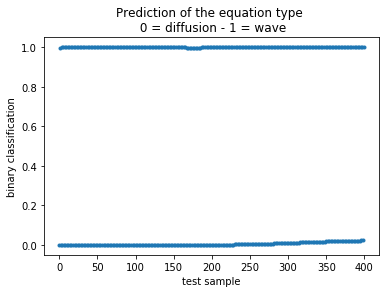

In [ ]:
plt.plot(pred,'.')
plt.xlabel("test sample")
plt.ylabel("binary classification")
plt.title("Prediction of the equation type \n 0 = diffusion - 1 = wave")

Le separateur entre les deux classes 0 et 1 est 0.5

In [ ]:
prediction_w=[]
for p in pred:
  if p[0]>0.5:
    prediction_w=prediction_w+[1]
  else:
    prediction_w=prediction_w+[0]

prediction=np.array(prediction_w)

In [ ]:
frequence_error=(prediction_w!=test_labels).sum()/len_test_set

print("The frequence of errors on w is ", frequence_error)

The frequence of errors on w is  0.0


L'erreurs est resté identique au cas ou C est complet.

Dans cette partie, c est predie pour la diffusion.

In [ ]:
train_set_diffusion=[]
train_c_diffusion=[]
for i in range(int(len_train_set/2)):
    train_set_diffusion=train_set_diffusion+[train_set[2*i]]
    train_c_diffusion=train_c_diffusion+[list_c_train[2*i]]
  
train_set_diffusion=np.array(train_set_diffusion)
train_c_diffusion=np.array(train_c_diffusion)

La fonction loss mean_squared_error est remplacé par mean_absolute_error

In [ ]:
model_c_dif = Sequential()
model_c_dif.add(layers.Dense(65, activation='relu', input_dim=sol_len))
model_c_dif.add(layers.Dense(30, activation='relu'))
model_c_dif.add(layers.Dense(1,activation='linear'))

print(model_c_dif.summary())

model_c_dif.compile(loss='mean_absolute_error', optimizer='Adam') # mean_squared_error est remplacé par mean_absolute_error

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 65)                6630      
_________________________________________________________________
dense_4 (Dense)              (None, 30)                1980      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 31        
Total params: 8,641
Trainable params: 8,641
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model_c_dif.fit(train_set_diffusion,
          train_c_diffusion,
          batch_size=10,
          epochs=30,
          validation_split=0.2,
          verbose=1)

Train on 1016 samples, validate on 255 samples
Epoch 1/30
1016/1016 [==============================] - 0s 328us/step - loss: 1.0143 - val_loss: 1.4719
Epoch 2/30
1016/1016 [==============================] - 0s 154us/step - loss: 0.3646 - val_loss: 0.2589
Epoch 3/30
1016/1016 [==============================] - 0s 132us/step - loss: 0.1026 - val_loss: 0.2560
Epoch 4/30
1016/1016 [==============================] - 0s 140us/step - loss: 0.0672 - val_loss: 0.1686
Epoch 5/30
1016/1016 [==============================] - 0s 143us/step - loss: 0.0449 - val_loss: 0.1203
Epoch 6/30
1016/1016 [==============================] - 0s 135us/step - loss: 0.0361 - val_loss: 0.1238
Epoch 7/30
1016/1016 [==============================] - 0s 145us/step - loss: 0.0327 - val_loss: 0.1075
Epoch 8/30
1016/1016 [==============================] - 0s 140us/step - loss: 0.0316 - val_loss: 0.1324
Epoch 9/30
1016/1016 [==============================] - 0s 130us/step - loss: 0.0272 - val_loss: 0.0846
Epoch 10/30
1016/

test_set_diffusion est cree pour tester le model.

In [ ]:
test_set_diffusion=[]
test_c_diffusion=[]
for i in range(int(len_test_set/2)):
    test_set_diffusion=test_set_diffusion+[test_set[2*i]]
    test_c_diffusion=test_c_diffusion+[c_test[2*i]]
  
test_set_diffusion=np.array(test_set_diffusion)
test_c_diffusion=np.array(test_c_diffusion)

In [ ]:
pred_c_diffusion=model_c_dif.predict(test_set_diffusion)
prediction_entraine=[]
prediction_improvise=[]
test_c_entraine=[]
test_c_improvise=[]
for i in range(len(test_c_diffusion)):
    if C_1<test_c_diffusion[i]<C_2:
        test_c_improvise=test_c_improvise+[test_c_diffusion[i]]
        prediction_improvise=prediction_improvise+[pred_c_diffusion[i][0]]
    else:
        test_c_entraine=test_c_entraine+[test_c_diffusion[i]]
        prediction_entraine=prediction_entraine+[pred_c_diffusion[i][0]]

prediction_entraine=np.asarray(prediction_entraine)
prediction_improvise=np.asarray(prediction_improvise)
test_c_entraine==np.asarray(test_c_entraine)
test_c_improvise==np.asarray(test_c_improvise)

variance_improvise=sum(abs(prediction_improvise-test_c_improvise))/len(test_c_improvise)
print("L'erreur moyenne dans la zone non entrainé est ",round(variance_improvise,3))
variance_entraine=sum(abs(prediction_entraine-test_c_entraine))/len(test_c_entraine)
print("L'erreur moyenne dans la zone entrainé est ",round(variance_entraine,3))

L'erreur moyenne dans la zone non entrainé est  0.045
L'erreur moyenne dans la zone entrainé est  0.022


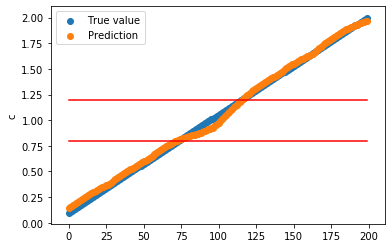

In [ ]:
plt.scatter(list(range(len(test_c_diffusion))),test_c_diffusion,label="True value")
plt.scatter(list(range(len(test_c_diffusion))),pred_c_diffusion, label="Prediction")
plt.ylabel('c')
plt.plot([C_1]*200,'r-')
plt.plot([C_2]*200,'r-')
plt.legend()

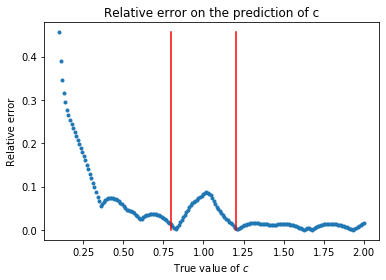

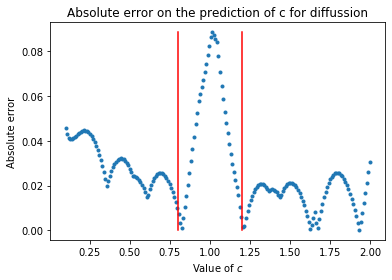

In [ ]:
abs_err_c_diffusion=np.linalg.norm(test_c_diffusion - pred_c_diffusion.T,axis=0)
rel_err_c_diffusion=np.linalg.norm(test_c_diffusion - pred_c_diffusion.T,axis=0)/test_c_diffusion

plt.figure()
plt.plot(test_c_diffusion,rel_err_c_diffusion,'.')
plt.plot([C_1,C_1],[min(rel_err_c_diffusion),max(rel_err_c_diffusion)],'r-')
plt.plot([C_2,C_2],[min(rel_err_c_diffusion),max(rel_err_c_diffusion)],'r-')
plt.title("Relative error on the prediction of c")
plt.xlabel("True value of $c$")
plt.ylabel('Relative error')
plt.show()


plt.figure()
plt.plot(test_c_diffusion,abs_err_c_diffusion,'.')
plt.plot([C_1,C_1],[min(abs_err_c_diffusion),max(abs_err_c_diffusion)],'r-')
plt.plot([C_2,C_2],[min(abs_err_c_diffusion),max(abs_err_c_diffusion)],'r-')
plt.title("Absolute error on the prediction of c for diffussion")
plt.xlabel("Value of $c$")
plt.ylabel('Absolute error')
plt.show()

Prediction de c pour la wave.

In [ ]:
train_set_wave=[]
train_c_wave=[]
for i in range(int(len_train_set/2)):
    train_set_wave=train_set_wave+[train_set[2*i+1]]
    train_c_wave=train_c_wave+[list_c_train[2*i+1]]
  
train_set_wave=np.array(train_set_wave)
train_c_wave=np.array(train_c_wave)

De même que pour la diffusion, le model a 3 couches denses.

In [ ]:
model_c_wave = Sequential()
model_c_wave.add(layers.Dense(65, activation='relu', input_dim=sol_len))
model_c_wave.add(layers.Dense(30, activation='relu'))
model_c_wave.add(layers.Dense(1,activation='linear'))

print(model_c_wave.summary())

model_c_wave.compile(loss='mean_squared_error', optimizer='adam')

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 65)                6630      
_________________________________________________________________
dense_16 (Dense)             (None, 30)                1980      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 31        
Total params: 8,641
Trainable params: 8,641
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model_c_wave.fit(train_set_wave,
          train_c_wave,
          batch_size=50,
          epochs=80,
          validation_split=0.2,
          verbose=1)

Train on 1016 samples, validate on 255 samples
Epoch 1/80
1016/1016 [==============================] - 0s 350us/step - loss: 0.0627 - val_loss: 1.9215e-04
Epoch 2/80
1016/1016 [==============================] - 0s 34us/step - loss: 0.0028 - val_loss: 0.0034
Epoch 3/80
1016/1016 [==============================] - 0s 30us/step - loss: 6.7138e-04 - val_loss: 0.0045
Epoch 4/80
1016/1016 [==============================] - 0s 30us/step - loss: 2.4514e-04 - val_loss: 0.0056
Epoch 5/80
1016/1016 [==============================] - 0s 34us/step - loss: 1.4426e-04 - val_loss: 0.0027
Epoch 6/80
1016/1016 [==============================] - 0s 36us/step - loss: 1.1179e-04 - val_loss: 0.0025
Epoch 7/80
1016/1016 [==============================] - 0s 32us/step - loss: 1.0637e-04 - val_loss: 0.0028
Epoch 8/80
1016/1016 [==============================] - 0s 32us/step - loss: 7.4862e-05 - val_loss: 0.0016
Epoch 9/80
1016/1016 [==============================] - 0s 50us/step - loss: 9.6811e-05 - val_loss: 

Teste du model:

In [ ]:
test_set_wave=[]
test_c_wave=[]
for i in range(int(len_test_set/2)):
    test_set_wave=test_set_wave+[test_set[2*i+1]]
    test_c_wave=test_c_wave+[c_test[2*i+1]]
  
test_set_wave=np.array(test_set_wave)
test_c_wave=np.array(test_c_wave)

In [ ]:
pred_c_wave=model_c_wave.predict(test_set_wave)

prediction_wave_entraine=[]
prediction_wave_improvise=[]
test_c_wave_entraine=[]
test_c_wave_improvise=[]
for i in range(len(test_c_wave)):
  if C_1<test_c_wave[i]<C_2:
    test_c_wave_improvise=test_c_wave_improvise+[test_c_wave[i]]
    prediction_wave_improvise=prediction_wave_improvise+[pred_c_wave[i][0]]
  else:
    test_c_wave_entraine=test_c_wave_entraine+[test_c_wave[i]]
    prediction_wave_entraine=prediction_wave_entraine+[pred_c_wave[i][0]]

prediction_wave_entraine=np.asarray(prediction_wave_entraine)
prediction_wave_improvise=np.asarray(prediction_wave_improvise)
test_c_wave_entraine==np.asarray(test_c_wave_entraine)
test_c_wave_improvise==np.asarray(test_c_wave_improvise)

variance_improvise_wave=sum(abs(prediction_wave_improvise-test_c_wave_improvise))/len(test_c_wave_improvise)
print("L'erreur moyenne dans la zone non entrainé est ",round(variance_improvise_wave,3))
variance_entraine_wave=sum(abs(prediction_wave_entraine-test_c_wave_entraine))/len(test_c_wave_entraine)
print("L'erreur moyenne dans la zone entrainé est ",round(variance_entraine_wave,3))

L'erreur moyenne dans la zone non entrainé est  0.026
L'erreur moyenne dans la zone entrainé est  0.005


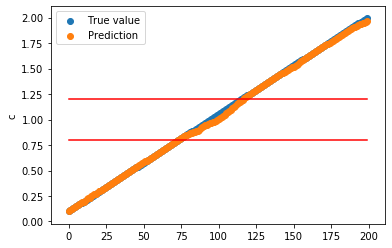

In [ ]:
plt.scatter(list(range(len(test_c_wave))),test_c_wave,label="True value")
plt.scatter(list(range(len(test_c_wave))),pred_c_wave, label="Prediction")
plt.ylabel('c')
plt.plot([C_1]*200,'r-')
plt.plot([C_2]*200,'r-')
plt.legend()

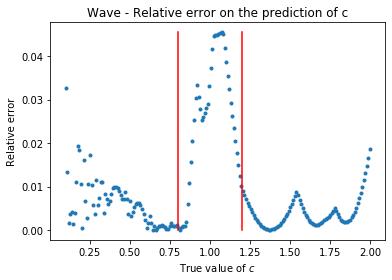

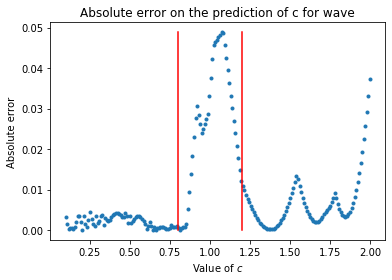

In [ ]:
rel_err_c_wave=np.linalg.norm(test_c_wave - pred_c_wave.T,axis=0)/test_c_wave
abs_err_c_wave=np.linalg.norm(test_c_wave - pred_c_wave.T,axis=0)

plt.figure()
plt.plot(test_c_wave,rel_err_c_wave,'.')
plt.plot([C_1,C_1],[min(rel_err_c_wave),max(rel_err_c_wave)],'r-')
plt.plot([C_2,C_2],[min(rel_err_c_wave),max(rel_err_c_wave)],'r-')
plt.title("Wave - Relative error on the prediction of c")
plt.xlabel("True value of $c$")
plt.ylabel('Relative error')
plt.show()


plt.figure()
plt.plot(test_c_wave,abs_err_c_wave,'.')
plt.plot([C_1,C_1],[min(abs_err_c_wave),max(abs_err_c_wave)],'r-')
plt.plot([C_2,C_2],[min(abs_err_c_wave),max(abs_err_c_wave)],'r-')
plt.title("Absolute error on the prediction of c for wave")
plt.xlabel("Value of $c$")
plt.ylabel('Absolute error')
plt.show()